Retrieve Dataset

**Imports**

In [1]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

## **Loading of clean dataset**


In [2]:
data = pd.read_csv('clean_dataset.csv', header=0, index_col=0)

In [3]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
binary_categories = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                     'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                     'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer',
                     'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
continuous_categories = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
                         'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

# **Dataset Balance Overview**

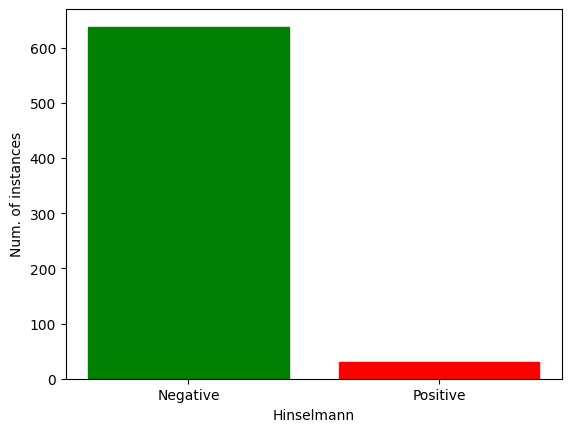

[638, 30]


In [5]:
H = data['Hinselmann']
h_distrib = [sum(1 for y in H if y == 0), sum(1 for y in H if y == 1)]
h_names = ['Negative', 'Positive']

h_bar_plot = plt.bar(h_names, h_distrib)
h_bar_plot[0].set_color('g')
h_bar_plot[1].set_color('r')
plt.xlabel('Hinselmann')
plt.ylabel('Num. of instances')
plt.show()
print(h_distrib)

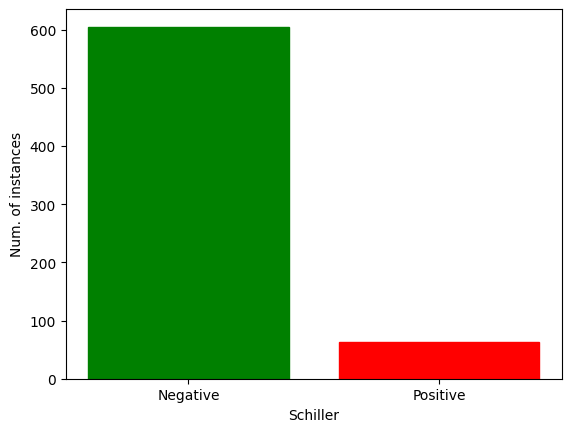

[605, 63]


In [6]:
S = data['Schiller']
s_distrib = [sum(1 for y in S if y == 0), sum(1 for y in S if y == 1)]
s_names = ['Negative', 'Positive']

s_bar_plot = plt.bar(s_names, s_distrib)
s_bar_plot[0].set_color('g')
s_bar_plot[1].set_color('r')
plt.xlabel('Schiller')
plt.ylabel('Num. of instances')
plt.show()
print(s_distrib)

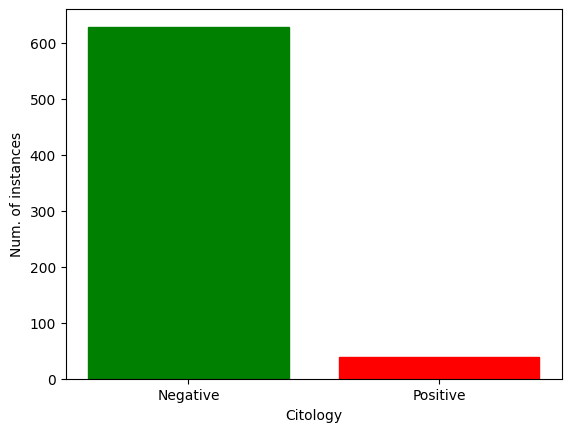

[629, 39]


In [7]:
C = data['Citology']
c_distrib = [sum(1 for y in C if y == 0), sum(1 for y in C if y == 1)]
c_names = ['Negative', 'Positive']

c_bar_plot = plt.bar(c_names, c_distrib)
c_bar_plot[0].set_color('g')
c_bar_plot[1].set_color('r')
plt.xlabel('Citology')
plt.ylabel('Num. of instances')
plt.show()
print(c_distrib)

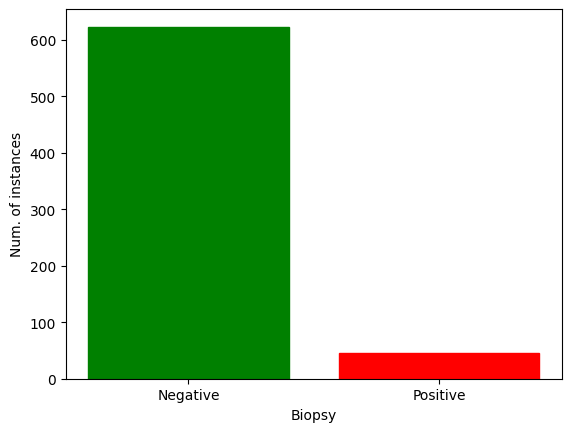

[623, 45]


In [8]:
B = data['Biopsy']
b_distrib = [sum(1 for y in B if y == 0), sum(1 for y in B if y == 1)]
b_names = ['Negative', 'Positive']

b_bar_plot = plt.bar(b_names, b_distrib)
b_bar_plot[0].set_color('g')
b_bar_plot[1].set_color('r')
plt.xlabel('Biopsy')
plt.ylabel('Num. of instances')
plt.show()
print(b_distrib)

In [9]:
X = data.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)
Y = data[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]

In [10]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [11]:
Y.head()

,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0
1,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0


In [44]:
Y = Y.drop(['Schiller','Citology','Biopsy'], axis=1)

In [45]:
Y.head()

,Hinselmann
0,0
1,0
3,0
4,0
5,0


# Normalizing continuous values

In [46]:
for cat in continuous_categories:
    X[cat] = (X[cat] - X[cat].min()) / (X[cat].max() - X[cat].min())

# Splitting train, test and validation

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #TODO understand how to add stratify

In [49]:
x_test.shape

(201, 30)

In [50]:
x_test.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
455,0.070423,0.000000,0.272727,0.181818,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
192,0.197183,0.037037,0.318182,0.363636,0.0,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
593,0.028169,0.037037,0.181818,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
639,0.056338,0.037037,0.181818,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
348,0.084507,0.000000,0.318182,0.181818,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [51]:
x_train.shape

(467, 30)

In [52]:
y_train.shape

(467, 1)

In [53]:
continuous_categories

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs (number)',
 'STDs: Number of diagnosis']

In [54]:
X.keys()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx'],
      dtype='object')

In [55]:
x_labels = list(X.keys())
y_label = 'Hinselmann'

In [56]:
x_labels

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx']

In [57]:
#Saving Training and Test sets
train_df = pd.DataFrame(x_train, columns=x_labels)
train_df[y_label] = y_train

test_df = pd.DataFrame(x_test, columns=x_labels)
test_df[y_label] = y_test

train_df.to_csv('train_with_outliers_normalized.csv')
test_df.to_csv('test_with_outliers_normalized.csv')

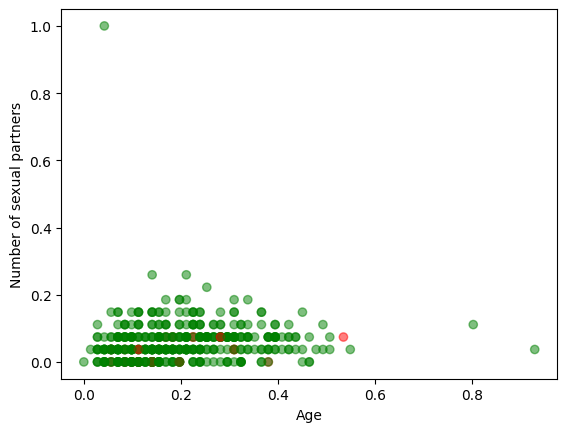

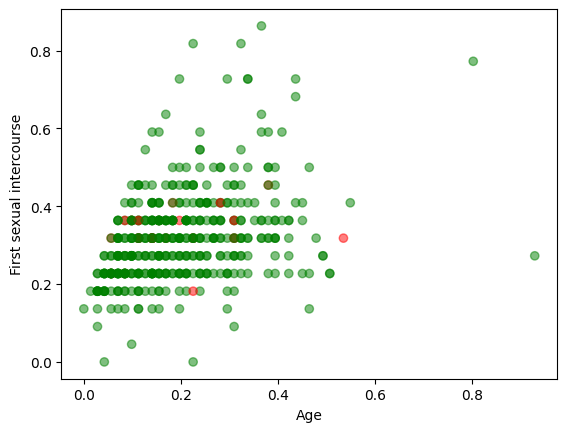

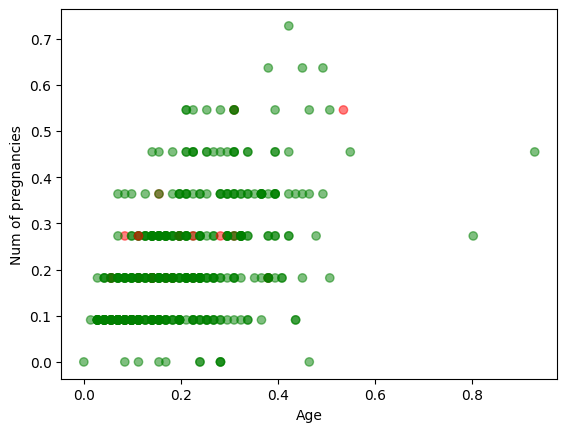

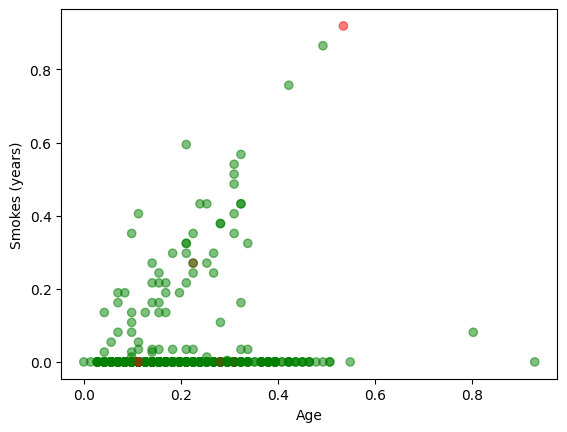

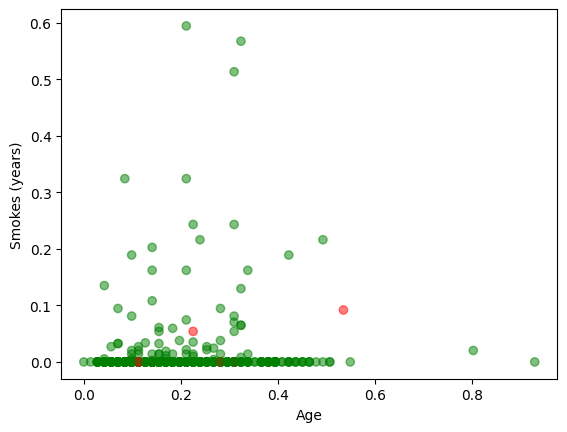

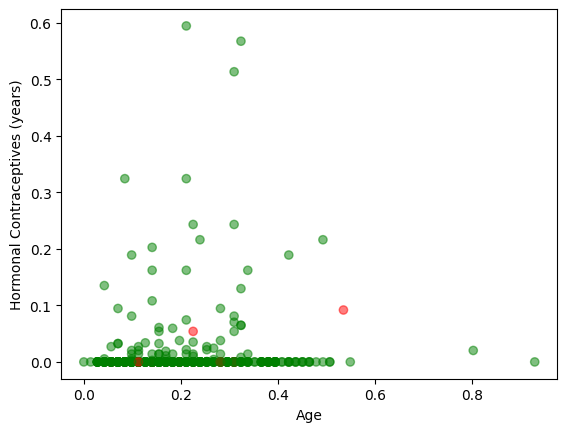

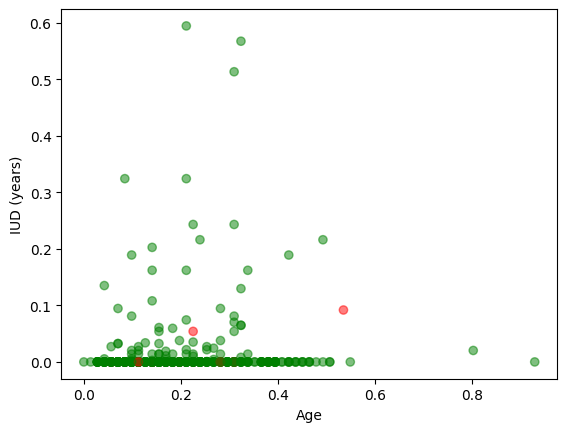

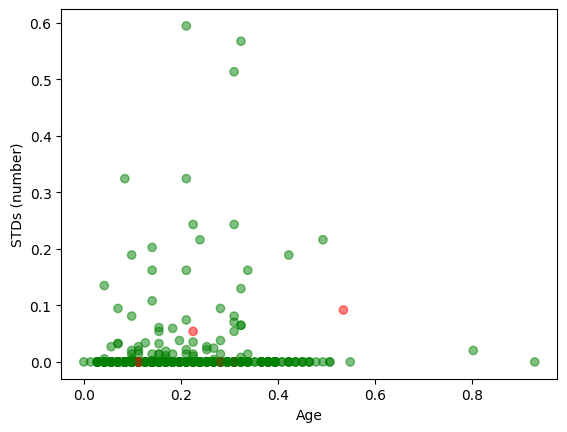

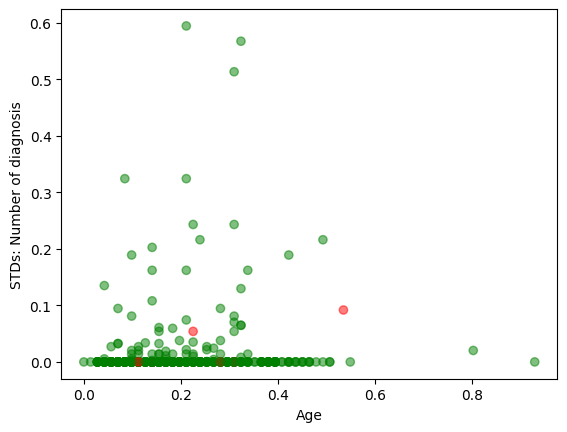

In [61]:
colors = ["red" if label == True else "green" for label in y_train.Hinselmann]

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9))= plt.subplots(3, 3) ## too small

plt.scatter(x_train.Age, x_train['Number of sexual partners'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Number of sexual partners')
plt.show()

plt.scatter(x_train.Age, x_train['First sexual intercourse'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('First sexual intercourse')
plt.show()

plt.scatter(x_train.Age, x_train['Num of pregnancies'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Num of pregnancies')
plt.show()

plt.scatter(x_train.Age, x_train['Smokes (years)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Smokes (years)')
plt.show()

plt.scatter(x_train.Age, x_train['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Smokes (years)')
plt.show()

plt.scatter(x_train.Age, x_train['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Hormonal Contraceptives (years)')
plt.show()

plt.scatter(x_train.Age, x_train['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('IUD (years)')
plt.show()

plt.scatter(x_train.Age, x_train['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('STDs (number)')
plt.show()

plt.scatter(x_train.Age, x_train['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('STDs: Number of diagnosis')
plt.show()

In [63]:
x_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.0,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,0.198661,0.055992,0.319739,0.210434,0.149893,0.036767,0.013592,0.650964,0.111576,0.104925,...,0.0,0.0,0.021413,0.002141,0.002141,0.029979,0.025696,0.004283,0.023555,0.025696
std,0.119998,0.063798,0.117529,0.129440,0.357349,0.116948,0.058670,0.477177,0.177997,0.306785,...,0.0,0.0,0.144913,0.046274,0.046274,0.102685,0.158396,0.065372,0.151819,0.158396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.037037,0.227273,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.169014,0.037037,0.318182,0.181818,0.000000,0.000000,0.000000,1.000000,0.026364,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.267606,0.074074,0.363636,0.272727,0.000000,0.000000,0.000000,1.000000,0.181818,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.929577,1.000000,0.863636,0.727273,1.000000,0.918919,0.594595,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Oversampling for Hinselmann

In [21]:
# Oversampling because of data imbalance
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(sampling_strategy='minority', random_state=42)

In [22]:
# For Hinselmann values first
H = y_train['Hinselmann']
x_o, h_o = oversampling.fit_resample(x_train, H)

In [23]:
print(x_o.shape, h_o.shape)

(894, 30) (894,)


In [24]:
H.head()

27     0
308    0
448    0
259    0
326    0
Name: Hinselmann, dtype: int64

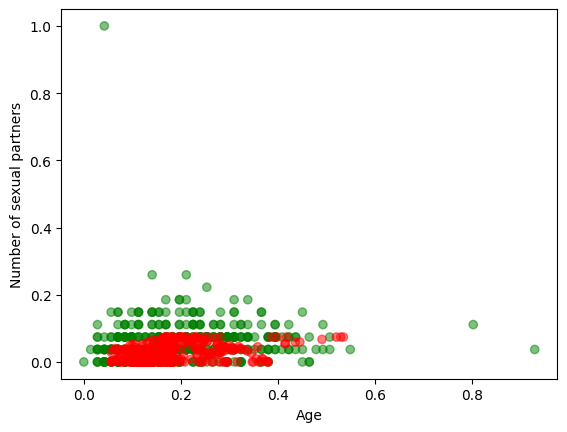

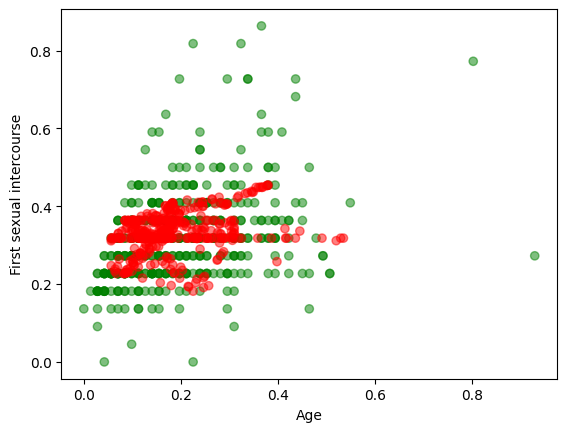

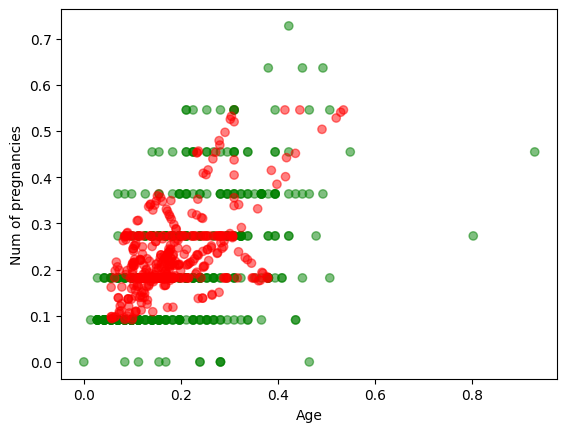

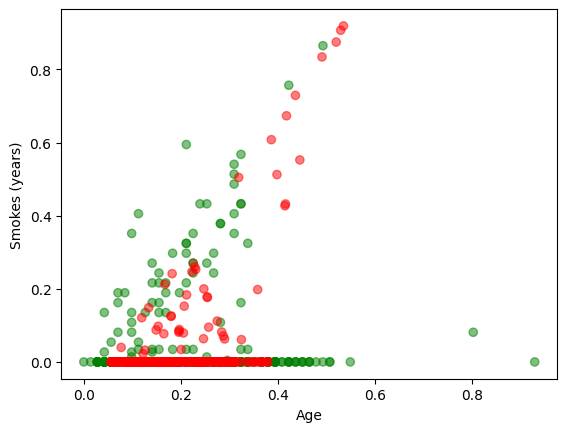

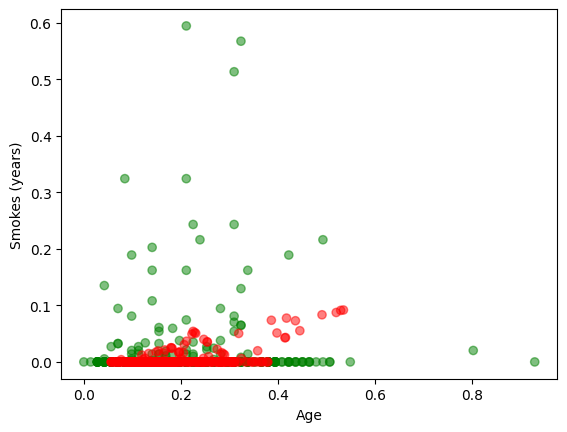

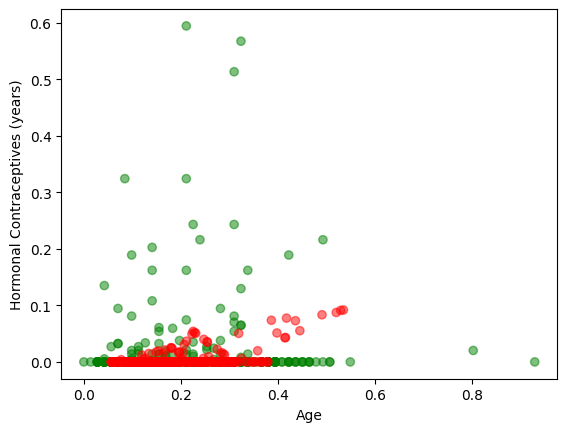

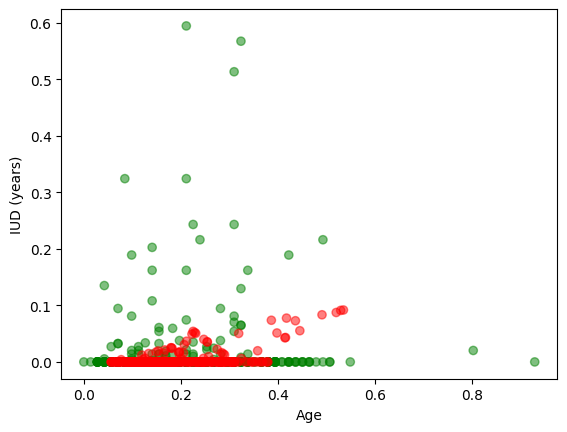

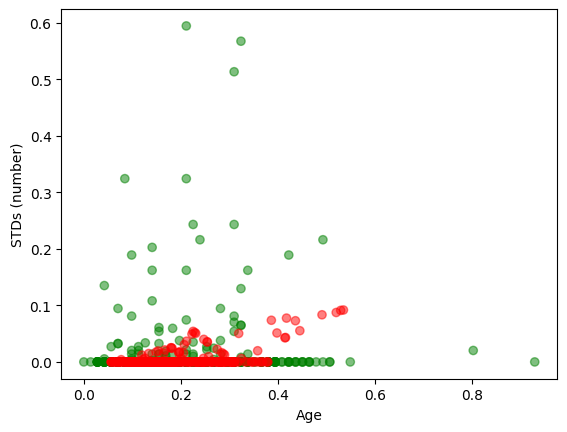

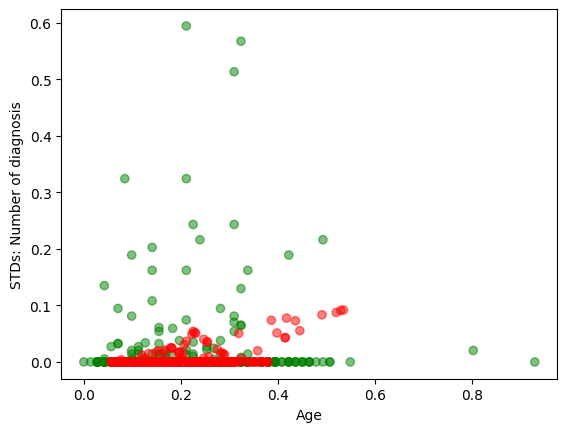

In [25]:
colors = ["red" if label == True else "green" for label in h_o]

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9))= plt.subplots(3, 3) ## too small

plt.scatter(x_o.Age, x_o['Number of sexual partners'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Number of sexual partners')
plt.show()

plt.scatter(x_o.Age, x_o['First sexual intercourse'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('First sexual intercourse')
plt.show()

plt.scatter(x_o.Age, x_o['Num of pregnancies'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Num of pregnancies')
plt.show()

plt.scatter(x_o.Age, x_o['Smokes (years)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Smokes (years)')
plt.show()

plt.scatter(x_o.Age, x_o['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Smokes (years)')
plt.show()

plt.scatter(x_o.Age, x_o['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Hormonal Contraceptives (years)')
plt.show()

plt.scatter(x_o.Age, x_o['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('IUD (years)')
plt.show()

plt.scatter(x_o.Age, x_o['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('STDs (number)')
plt.show()

plt.scatter(x_o.Age, x_o['Smokes (packs/year)'] , c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('STDs: Number of diagnosis')
plt.show()

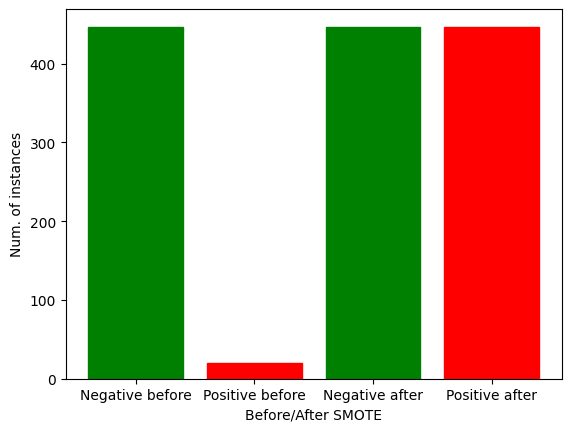

[447, 20, 447, 447]


In [26]:
before_smote_distrib = [sum(1 for y in H if y == 0), sum(1 for y in H if y == 1)]
before_smote_names = ['Negative before', 'Positive before', 'Negative after', 'Positive after']

before_smote_distrib.extend([sum(1 for y in h_o if y == 0), sum(1 for y in h_o if y == 1)])

smote_bar_plot = plt.bar(before_smote_names, before_smote_distrib)
smote_bar_plot[0].set_color('g')
smote_bar_plot[1].set_color('r')
smote_bar_plot[2].set_color('g')
smote_bar_plot[3].set_color('r')
plt.xlabel('Before/After SMOTE')
plt.ylabel('Num. of instances')
plt.show()
print(before_smote_distrib)

# Save new datasets

In [40]:
train_data_str = x_train.to_csv()
train_target_str = y_train.to_csv()
test_data_str = x_test.to_csv()
test_target_str = y_test.to_csv()
train_ho_data_str = x_o.to_csv()
train_ho_target_str = h_o.to_csv()

In [41]:
train_data_file = drive.CreateFile({'id': '1U49KKv-vnpqGRJqyoPk9I1eaCoo3PgpU', 'title':'train_data.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
train_data_file.SetContentString(train_data_str)
train_data_file.Upload()
train_target_file = drive.CreateFile({'id': '1fvxsXE6hccSXQVRjjP1G-q6KD8IU97iG', 'title':'train_target.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
train_target_file.SetContentString(train_target_str)
train_target_file.Upload()
test_data_file = drive.CreateFile({'id': '1KKWo7s1zXKcEZUsu4nSsit0OIT5l-MRM', 'title':'test_data.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
test_data_file.SetContentString(test_data_str)
test_data_file.Upload()
test_target_file = drive.CreateFile({'id': '1jC9ad9xn2JWr5F9ulKfFz9MR70B2FrCt', 'title':'test_target.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
test_target_file.SetContentString(test_target_str)
test_target_file.Upload()
train_ho_data_file = drive.CreateFile({'id': '1nXow2hrmu4pYGbs3I7uBoZ_8mJdBTOFi', 'title':'oversampled_train_data.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
train_ho_data_file.SetContentString(train_ho_data_str)
train_ho_data_file.Upload()
train_ho_target_file = drive.CreateFile({'id': '1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui', 'title':'oversampled_train_target.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
train_ho_target_file.SetContentString(train_ho_target_str)
train_ho_target_file.Upload()

In [42]:
# To avoid duplication, first create file without id, after upload, check the id and add it as a parameter when using CreateFile()
train_ho_target_file['id']

'1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui'